In [1]:
!pip install pandas numpy matplotlib seaborn torch scikit-learn

In [2]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

Epoch 1/80 Loss: 1.1994
Epoch 2/80 Loss: 1.1928
Epoch 3/80 Loss: 1.1864
Epoch 4/80 Loss: 1.1799
Epoch 5/80 Loss: 1.1734
Epoch 6/80 Loss: 1.1670
Epoch 7/80 Loss: 1.1605
Epoch 8/80 Loss: 1.1541
Epoch 9/80 Loss: 1.1478
Epoch 10/80 Loss: 1.1416
Epoch 11/80 Loss: 1.1354
Epoch 12/80 Loss: 1.1293
Epoch 13/80 Loss: 1.1232
Epoch 14/80 Loss: 1.1172
Epoch 15/80 Loss: 1.1112
Epoch 16/80 Loss: 1.1052
Epoch 17/80 Loss: 1.0992
Epoch 18/80 Loss: 1.0930
Epoch 19/80 Loss: 1.0868
Epoch 20/80 Loss: 1.0805
Epoch 21/80 Loss: 1.0741
Epoch 22/80 Loss: 1.0675
Epoch 23/80 Loss: 1.0608
Epoch 24/80 Loss: 1.0540
Epoch 25/80 Loss: 1.0471
Epoch 26/80 Loss: 1.0400
Epoch 27/80 Loss: 1.0328
Epoch 28/80 Loss: 1.0255
Epoch 29/80 Loss: 1.0180
Epoch 30/80 Loss: 1.0104
Epoch 31/80 Loss: 1.0028
Epoch 32/80 Loss: 0.9950
Epoch 33/80 Loss: 0.9870
Epoch 34/80 Loss: 0.9789
Epoch 35/80 Loss: 0.9707
Epoch 36/80 Loss: 0.9624
Epoch 37/80 Loss: 0.9540
Epoch 38/80 Loss: 0.9454
Epoch 39/80 Loss: 0.9367
Epoch 40/80 Loss: 0.9278
Epoch 41/

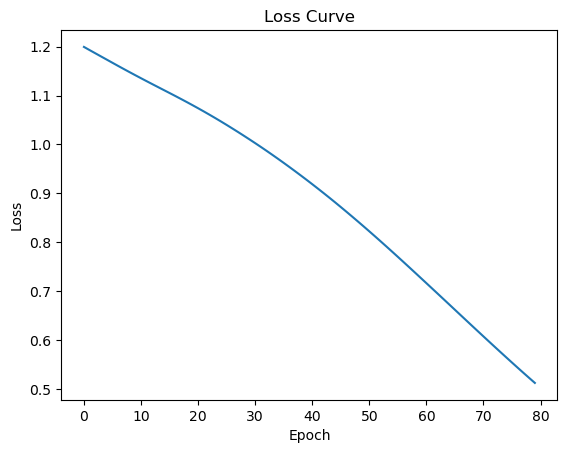

Test Accuracy: 94.05940594059405


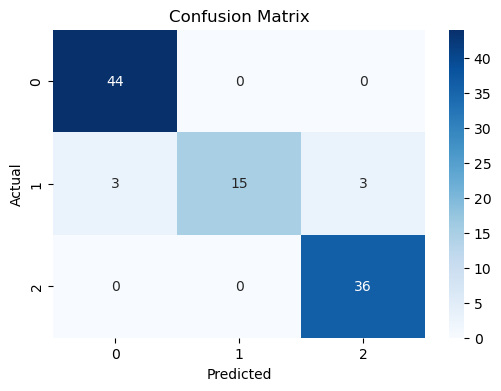

In [61]:
df = pd.read_csv("penguins_size.csv")
df = df.dropna()

target = "species"

le = LabelEncoder()
df[target] = le.fit_transform(df[target])

X = df[['culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g']].values
y = df[target].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

input_dim = X_train.shape[1]
output_dim = len(np.unique(y))

class ANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, output_dim)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)

model = ANN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

losses = []
epochs = 80

for epoch in range(1, epochs+1):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    print(f"Epoch {epoch}/{epochs} Loss: {loss.item():.4f}")

plt.plot(losses)
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

with torch.no_grad():
    pred_test = torch.argmax(model(X_test), 1)

test_acc = (pred_test == y_test).sum().item() / len(y_test) * 100
print("Test Accuracy:", test_acc)

labels = list(np.unique(y))
cm = confusion_matrix(y_test, pred_test, labels=labels)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()